## 1. Importing the required libraries and making some functions

In [ ]:
# to deal with dataframes and matrices
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# to hide warnings messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Now to Center the plots

from IPython.core.display import HTML as Center

Center('''<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
<style>''')

In [ ]:
def make_autopct(values):
    '''
    This will help set the autopct for pie charts as we want it to appear
    :param values -> the data which is shown in the pie
    '''
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val)
    return my_autopct

In [ ]:
def setting_dataframe(df):
    '''
    This function display the results in an organised dataframe form
    :param df -> the dataframe
    '''
    df = df.style.set_table_styles([{"selector": "td, th", "props": [("border", "1px solid grey !important")]},
                                    {"selector": "th", "props": [('text-align', 'center')]}])
    df = df.set_properties(**{'text-align': 'center'}).hide(axis="index")
    return df

## 2. Reading File

In [ ]:
netflix_df = pd.read_csv('...Data/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_df.set_index('show_id', inplace=True)

In [ ]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Data Exploration

### 3.1. General information about the data

In [ ]:
# Size of the data

data_size = netflix_df.shape
print('This data has {} entries and {} features(columns).'.format(data_size[0], data_size[1]))

This data has 8807 entries and 11 features(columns).


In [ ]:
#the features(columns) of this data

primary_key = netflix_df.index.name
columns = netflix_df.columns
print('The primary key or the index of this data is {} and its columns are: '.format(primary_key))
for idx, column in enumerate(columns):
    print('{}) {}'.format(idx+1, column), end='\n')

The primary key or the index of this data is show_id and its columns are: 
1) type
2) title
3) director
4) cast
5) country
6) date_added
7) release_year
8) rating
9) duration
10) listed_in
11) description


In [ ]:
# what each column represent

netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


From the previous cell I've gained some information:
1. There're some features(columns) which have more than one information such as __cast__ and __listed_in__
2. The __duration__ column has inconsistent data, as some of the entries are about TV Shows and the other are about Movies
3. There're some movies/tv shows which their title seems as integers!
4. The year in __date_added__ may differ from the __release_year__
5. The __rating__ column has different information from what I expected!

Let's explore those titles which have numbers, and those strange ratings

In [ ]:
# 1. exploring the titles

netflix_df['title'].tail(10)

show_id
s8798             Zak Storm
s8799              Zed Plus
s8800                 Zenda
s8801    Zindagi Gulzar Hai
s8802               Zinzana
s8803                Zodiac
s8804           Zombie Dumb
s8805            Zombieland
s8806                  Zoom
s8807                Zubaan
Name: title, dtype: object

It seems that titles are ordered alphabetically, so the entries with numbers as their titles may be real movies/tv shows.
> After some search, I've found that those movies/tv shows exist and those are their real names.

In [ ]:
# 2. exploring the ratings
netflix_df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

To understand what those ratings represent, I need Google's help :)
> After some search, I've found that those ratings are not our ratings but They're MPA film ratings.

MPA stands for Motion Picture Associations, their film rating system provides parents with the information needed to determine if a film is appropriate for their children.

Now it's better to change this column's name to avoid any misunderstanding.

In [ ]:
netflix_df.rename(columns={'rating':'MPA_rating'}, inplace=True)

### <u>Ratings Guide:</u> ###
* __TV-MA__ : Unsuitable for children under 17 (Mature Audience Only).
<br>

* __TV-14__ : Unsuitable for children under 14.
<br>

* __TV-PG__ : Parents or guardians may find inappropriate for younger children.
<br>

* __R__ : Under 17 requires accompanying parent or adult guardian (Restricted).
<br>

* __PG-13__ : Parents strongly cautioned, some material may be inappropriate for children under 13.
<br>

* __TV-Y__ : Programs aimed at a very young audience, including children from ages 2-6.
<br>

* __TV-Y7__ : Programs most appropriate for children age 7 and up.
<br>

* __PG__ : Some material may not be suitable for children (Parental Guidance suggested).
<br>

* __TV-G__ : Programs suitable for all ages; these are not necessarily children's shows.
<br>

* __NR__ : (Not Rated)
<br>

* __G__ : (General Audiences)
<br>

* __TV-Y7-FV__ : Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category.
<br>

* __UR__ : (Un-rated) (Same as NR)
<br>

* __NC-17__ : No children under 17

<hr>

In [ ]:
# let's move to the data types
netflix_df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
MPA_rating      object
duration        object
listed_in       object
description     object
dtype: object

From the previous cell, it seems that there're some columns which have incorrect data types such as __date_added__. They've to be *datetime* (will deal with it in the __Data Cleaning__ phase).
<hr>

## 3.2. Exploring some categorized columns

In [ ]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [ ]:
netflix_df['country'].value_counts()

country
United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In the previous cell, I've found that there're some columns which have more than one information per entry such as __cast__ and __listed_in__. Now, the __country__ column will join them because as shown, there're entries with more than one country.

In [ ]:
netflix_df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1961       1
1925       1
1959       1
1966       1
1947       1
Name: count, Length: 74, dtype: int64

In [ ]:
netflix_df['MPA_rating'].value_counts()

MPA_rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
netflix_df['listed_in'].value_counts()

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64

<hr>

## 4.0 Data Cleaning

### 4.1 Search For Duplicated Entries

In [ ]:
duplicateRows = netflix_df[netflix_df.duplicated(['title'])]
duplicateRows

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,


Perfect! There are no Duplicate Entries

<hr>

### 4.2. Search for nulls

In [ ]:
netflix_df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
MPA_rating         4
duration           3
listed_in          0
description        0
dtype: int64

It seems that there're some columns with few nulls such as __date_added__ and __rating__, and many columns with MANY nulls such as __director__, __cast__ and __country__.

#### 4.2.1. Let's deal with the columns with few nulls

<ul>
    1. Movies/TV Shows ratings
</ul>

In [ ]:
netflix_df[netflix_df['MPA_rating'].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


#### From Netflix and IMDB platforms, I found that the movies' ratings are
* 13th: A Conversation with Oprah Winfrey & Ava DuVernay : PG-13
* Gargantia on the Verdurous Planet : TV-14
* Little Lunch : TV-MA
* My Honor Was Loyalty : PG-13

In [ ]:
netflix_df.loc[netflix_df['title'] == "13TH: A Conversation with Oprah Winfrey & Ava DuVernay", 'MPA_rating'] = "PG-13"
netflix_df.loc[netflix_df['title'] == "Gargantia on the Verdurous Planet", 'MPA_rating'] = "TV-14"
netflix_df.loc[netflix_df['title'] == "Little Lunch", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title'] == "Louis C.K. 2017", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title'] == "Louis C.K.: Hilarious", 'MPA_rating'] = "NR"
netflix_df.loc[netflix_df['title'] == "Louis C.K.: Live at the Comedy Store", 'MPA_rating'] ="NC-17"
netflix_df.loc[netflix_df['title'] == "My Honor Was Loyalty", 'MPA_rating'] = "PG-13"

In [ ]:
netflix_df['MPA_rating'].isnull().sum()

np.int64(0)

<ul>
    2. Movies/TV Shows duration
</ul>

In [ ]:
netflix_df[netflix_df['duration'].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NC-17,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
netflix_df.loc[netflix_df['title'] == "Louis C.K. 2017", 'duration'] = "74 min"
netflix_df.loc[netflix_df['title'] == "Louis C.K.: Hilarious", 'duration'] = "84 min"
netflix_df.loc[netflix_df['title'] == "Louis C.K.: Live at the Comedy Store", 'duration'] = "66 min"

In [ ]:
netflix_df['duration'].isnull().sum()

np.int64(0)

<ul>
3. Movies/TV Shows added date
</ul>

In [ ]:
# there're 10 movies which their date_added is null

netflix_df[netflix_df['date_added'].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


#### From IMDB, we found their added dates
* A Young Doctor's Notebook and Other Stories: Oct 2, 2013
* Anthony Bourdain: Parts Unknown: Apr 14, 2013
* Frasier: Sep 23, 2003
* Friends: Sep 25, 2003
* Gunslinger Girl: Jan 7, 2008
* Kikoriki: Just 2010
* La Familia P. Luche: Jul 8, 2012
* Maron: May 4, 2016
* Red vs. Blue : Apr 1, 2015
* The Adventures of Figaro Pho: Just 2015

In [ ]:
#let's assign the dates

netflix_df.loc[netflix_df['title'] == "A Young Doctor's Notebook and Other Stories", 'date_added'] = "Oct 2, 2013"
netflix_df.loc[netflix_df['title'] == "Anthony Bourdain: Parts Unknown", 'date_added'] = "Apr 14, 2013"
netflix_df.loc[netflix_df['title'] == "Frasier", 'date_added'] = "Sep 23, 2003"
netflix_df.loc[netflix_df['title'] == "Friends", 'date_added'] = "Sep 25, 2003"
netflix_df.loc[netflix_df['title'] == "Gunslinger Girl", 'date_added'] = "Jan 7, 2008"
netflix_df.loc[netflix_df['title'] == "Kikoriki", 'date_added'] = "2010"
netflix_df.loc[netflix_df['title'] == "La Familia P. Luche", 'date_added'] = "Jul 8, 2012"
netflix_df.loc[netflix_df['title'] == "Maron", 'date_added'] = "May 4, 2016"
netflix_df.loc[netflix_df['title'] == "Red vs. Blue", 'date_added'] = "Apr 1, 2015"
netflix_df.loc[netflix_df['title'] == "The Adventures of Figaro Pho", 'date_added'] = "2015"

In [ ]:
netflix_df['date_added'].isnull().sum()

np.int64(0)

#### 4.2.2. Let's deal with the columns with many nulls

<ul>
    1. Country
</ul>

In [ ]:
null_countries = netflix_df['country'].isnull().sum()
print(
    f"The number of entries which have no country (Null) = {null_countries}\n"
    f"The percentage between those entries and the total entries is {round(null_countries / data_size[0] * 100, 2)} %"
)

The number of entries which have no country (Null) = 831
The percentage between those entries and the total entries is 9.44 %


In [ ]:
# the percentage number shows that those entries' numbers is very small relative to the whole data, so we can drop them

netflix_df = netflix_df[netflix_df['country'].notna()]

In [ ]:
netflix_df['country'].isnull().sum()

np.int64(0)

<ul>
    2. cast and director
    
    
    Those columns have so many null values, but I'm not interested in them so I'll not drop their entries.
</ul>

<hr>

## 4.3 Converting Some Columns to their proper types

In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce',infer_datetime_format=True)

In [ ]:
netflix_df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
MPA_rating              object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


## 5. Data Analysis And Visualisation

#### 5.1 TV shows Vs. Movies

In [ ]:
tv_vs_movies = netflix_df['type'].value_counts()
tv_vs_movies

type
Movie      5691
TV Show    2285
Name: count, dtype: int64

In [ ]:
tv_vs_movies = tv_vs_movies.to_list()

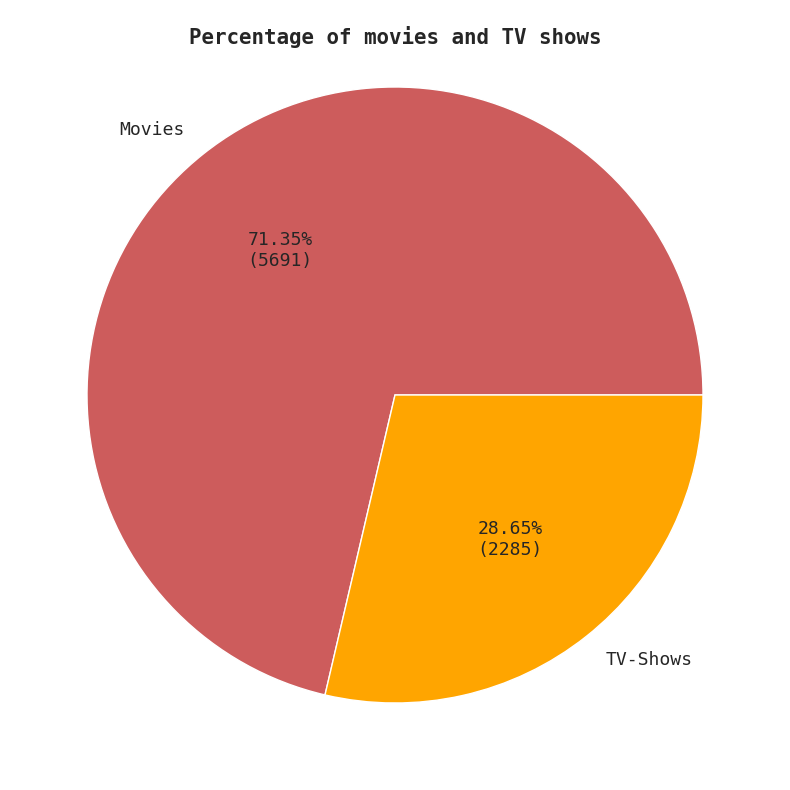

In [ ]:
plt.figure(figsize=(10,10))

plt.pie(
    tv_vs_movies,
    labels=['Movies', 'TV-Shows'],
    autopct=make_autopct(tv_vs_movies),
    colors=['indianred', 'orange'],
    textprops={'fontsize': 13, 'fontname': 'monospace'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'antialiased': True}
)

plt.title(
    'Percentage of movies and TV shows',
    fontdict={'fontsize': 15, 'fontweight': 'bold', 'fontname': 'monospace'},
    y=0.945
)

plt.savefig('MoviesVsTVShows.png', dpi=300, bbox_inches='tight')
plt.show()


<hr>

#### 5.2. The growth of content creation over the years ####

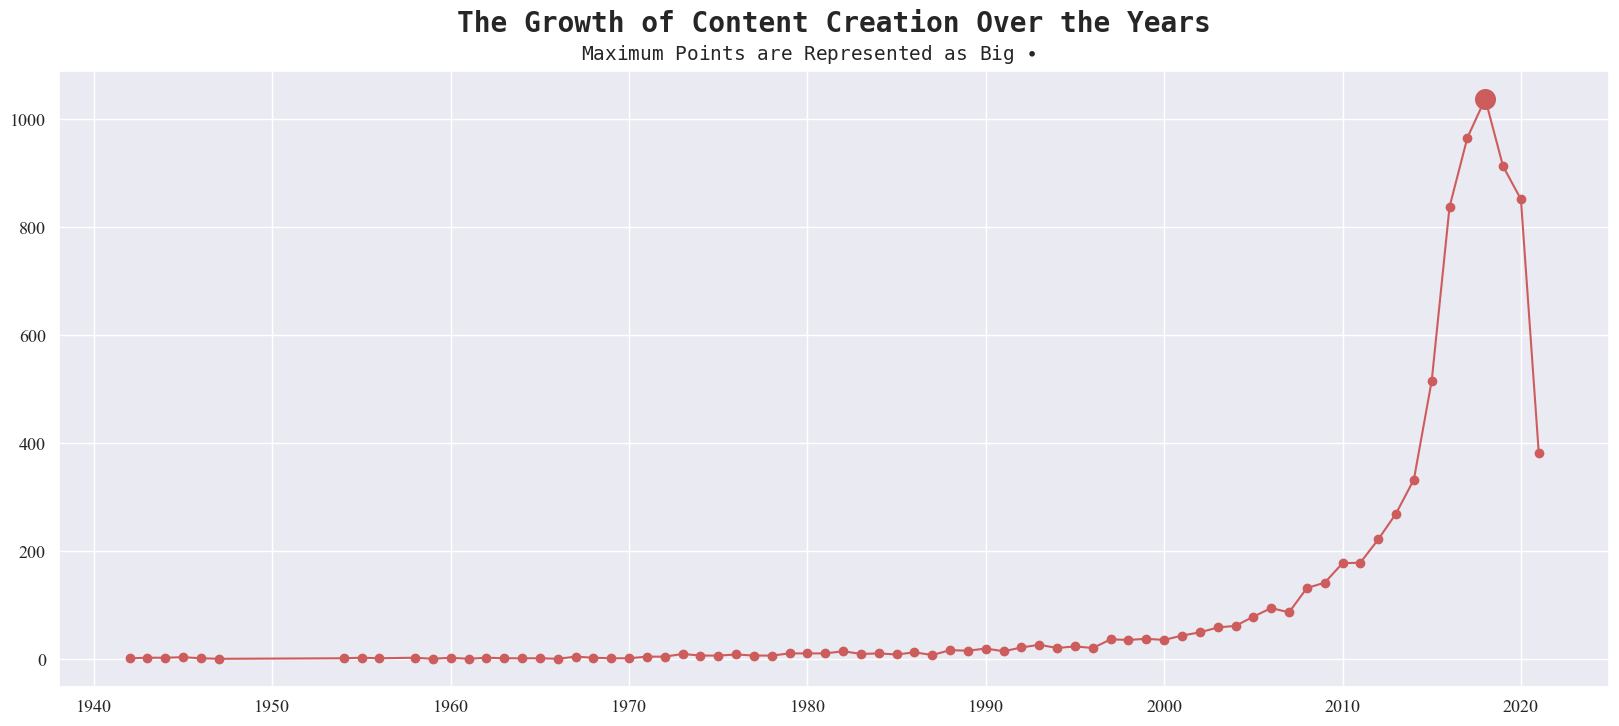

In [ ]:
number_of_contents = netflix_df.groupby('release_year').size().to_list()
years = np.sort(netflix_df['release_year'].unique())

max_number_of_contents = max(number_of_contents)
index = number_of_contents.index(max_number_of_contents)

plt.figure(figsize=(20,8))

plt.plot(
    years,
    number_of_contents,
    color='indianred',
    marker='o',
    markersize=6
)

plt.scatter(
    years[index],
    max_number_of_contents,
    s=200,
    color='indianred',
    marker='o'
)

plt.title(
    'The Growth of Content Creation Over the Years', 
    fontsize=20, 
    fontweight='bold',
    fontname='monospace',
    y=1.05
)
plt.suptitle(
    "Maximum Points are Represented as Big $\\bullet$",
    fontsize=14,
    fontname='monospace',
    y=0.915
)
plt.xticks(fontsize=13, fontname='Times New Roman')
plt.yticks(fontsize=13, fontname='Times New Roman')

plt.savefig('ContentCreationGrowth.png', dpi=300, bbox_inches='tight')
plt.show()

The viz shows that the year with the highest number of content is 2018 which means that the data may be not complete.

<hr>

### 5.3. Monitor content creations along the months

In [ ]:
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month

In [ ]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description,month_added
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9.0


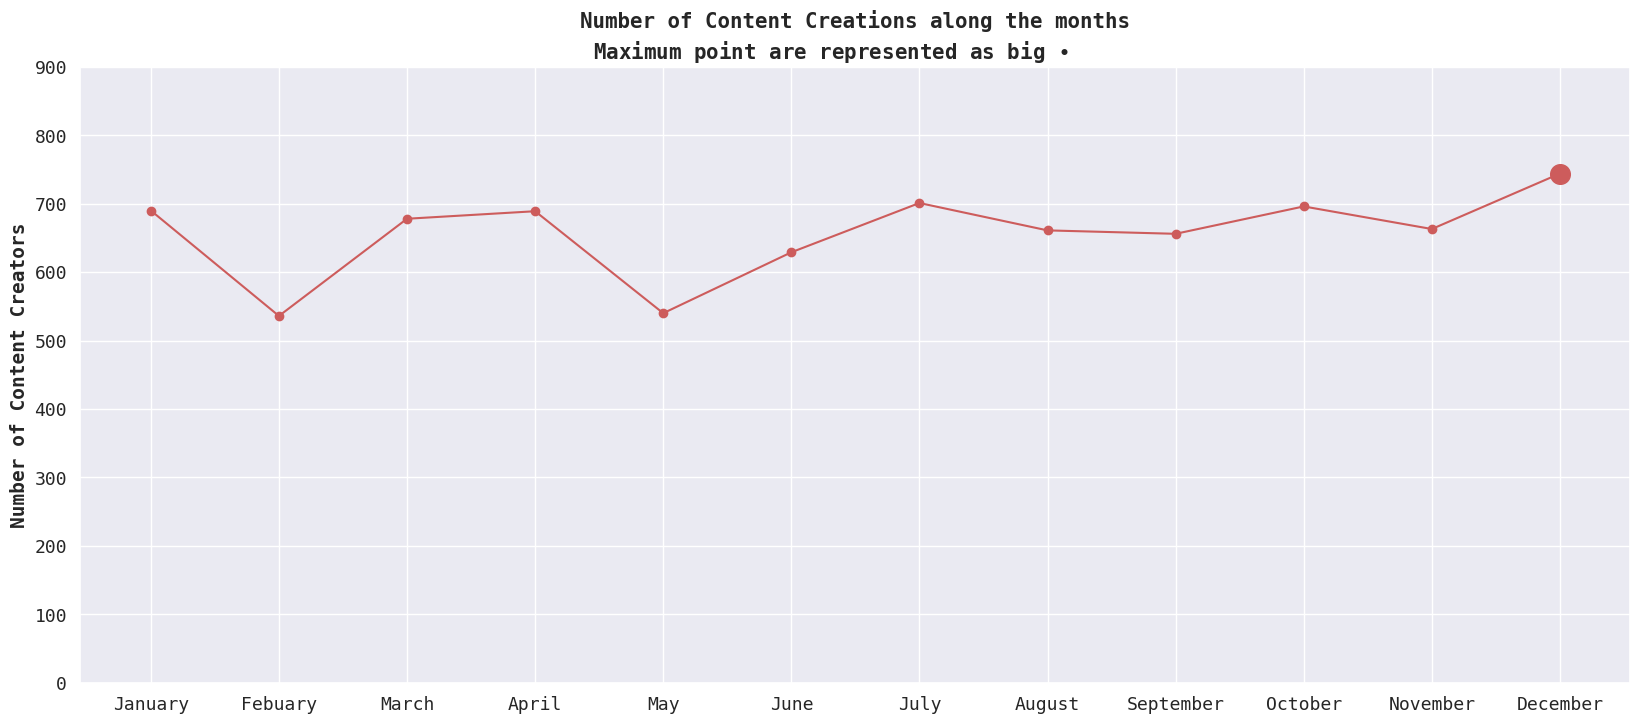

In [ ]:
number_of_contents = netflix_df.groupby('month_added').size().to_list()
months_names = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

max_number_of_contents = max(number_of_contents)
index = number_of_contents.index(max(number_of_contents))

plt.figure(figsize=(20,8))

plt.title(
    'Number of Content Creations along the months',
    fontsize=15,
    fontweight='bold',
    fontname='monospace',
    y=1.05
)

plt.plot(
    months_names,
    number_of_contents,
    color='indianred',
    marker='o',
    markersize=6
)

plt.scatter(
    months_names[index],
    max_number_of_contents,
    s=200,
    color='indianred',
    marker='o'
)

plt.suptitle(
    'Maximum point are represented as big {}'.format(r'$\bullet$'),
    fontsize=15,
    fontweight='bold',
    fontname='monospace',
    y=0.915,   
)

plt.ylabel(
    'Number of Content Creators',
    fontname='monospace',
    fontweight='bold',
    fontsize='14'
)

plt.xticks(
    fontsize='13',
    fontname='monospace'
)

plt.yticks(
    fontsize='13',
    fontname='monospace'
)

plt.ylim([0, 900])


plt.savefig('ContentCreatorsAlongMonths.png', dpi=300, bbox_inches='tight')
plt.show()

<hr>

### 5.4. The oldest 10 tv series and movies

In [ ]:
# oldest 10 tv series

oldest_tv_series = (
    netflix_df[netflix_df['type']=="TV Show"][['title','release_year']]
    .sort_values(by="release_year")
    .head(10)
    .reset_index(drop=True)
)

In [ ]:
oldest_tv_series

,title,release_year
0,Five Came Back: The Reference Films,1945
1,Pioneers of African-American Cinema,1946
2,The Twilight Zone (Original Series),1963
3,The Andy Griffith Show,1967
4,Monty Python's Fliegender Zirkus,1972
5,Monty Python's Flying Circus,1974
6,Dad's Army,1977
7,El Chavo,1979
8,Ninja Hattori,1981
9,Robotech,1985


In [ ]:
# oldest 10 tv series

old_movies = (
    netflix_df[netflix_df['type'] == 'Movie'][['title','release_year']]
    .sort_values(by='release_year')
    .head(10)
    .reset_index(drop=True)
)

In [ ]:
old_movies

,title,release_year
0,Prelude to War,1942
1,The Battle of Midway,1942
2,Why We Fight: The Battle of Russia,1943
3,Undercover: How to Operate Behind Enemy Lines,1943
4,WWII: Report from the Aleutians,1943
5,The Negro Soldier,1944
6,The Memphis Belle: A Story of a\nFlying Fortress,1944
7,Tunisian Victory,1944
8,Nazi Concentration Camps,1945
9,Know Your Enemy - Japan,1945


<hr>

### 5.5. The highest 10 countries contributed in content creation
As we see, many movies or TV shows were filmed in many countries, and we want to take into count all the countires. So, we need to get in every movies/TV show and see the countries where they were filmed.

In [ ]:
def count_countires(countries_df):
    '''
    This function just counts the number of countries appears in each entry and returns the dictionary which contains this information
    :param countries_df -> the dataframe which I need to count the countries appear in it
    '''
    countries_dict = dict()
    for country_entry in countries_df:
        countries_list = country_entry.split(', ')
        for country in countries_list:
            if country in countries_dict.keys():
                countries_dict[country] += 1
            else:
                countries_dict[country] = 1
    return countries_dict

In [ ]:
movies_countries = netflix_df[netflix_df["type"]=="Movie"]["country"]
shows_countries = netflix_df[netflix_df["type"]=="TV Show"]["country"]

movies_dict = count_countires(movies_countries)
shows_dict = count_countires(shows_countries)

# Now let's see the results in a dataframe
movies = (
    pd.DataFrame(
    movies_dict.items(),
    columns=["Country", "Frequency"])
    .sort_values(by="Frequency", ascending=False)
    .reset_index(drop=True)
)

shows = (
    pd.DataFrame(
    shows_dict.items(),
    columns=["Country", "Frequency"])
    .sort_values(by="Frequency", ascending=False)
    .reset_index(drop=True)
)

In [ ]:
movies.head(10)

,Country,Frequency
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


In [ ]:
shows.head(10)

,Country,Frequency
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,66
9,Spain,61


In [ ]:
all_contents = movies.merge(shows, how="outer", on="Country")

all_contents.rename(
    columns={"Frequency_x": "Number of Movies", "Frequency_y": "Number of TV Shows"}, 
    inplace=True
)

# Fill NaNs with 0 before converting to int
all_contents["Number of Movies"] = all_contents["Number of Movies"].fillna(0).astype(int)
all_contents["Number of TV Shows"] = all_contents["Number of TV Shows"].fillna(0).astype(int)

# Add a total column
all_contents["Total"] = all_contents["Number of Movies"] + all_contents["Number of TV Shows"]

# Sort by total (highest first) and take top 10
all_contents = all_contents.sort_values(by="Total", ascending=False).head(10).reset_index(drop=True)

all_contents

,Country,Number of Movies,Number of TV Shows,Total
0,United States,2751,938,3689
1,India,962,84,1046
2,United Kingdom,532,272,804
3,Canada,319,126,445
4,France,303,90,393
5,Japan,119,199,318
6,Spain,171,61,232
7,South Korea,61,170,231
8,Germany,182,44,226
9,Mexico,111,58,169


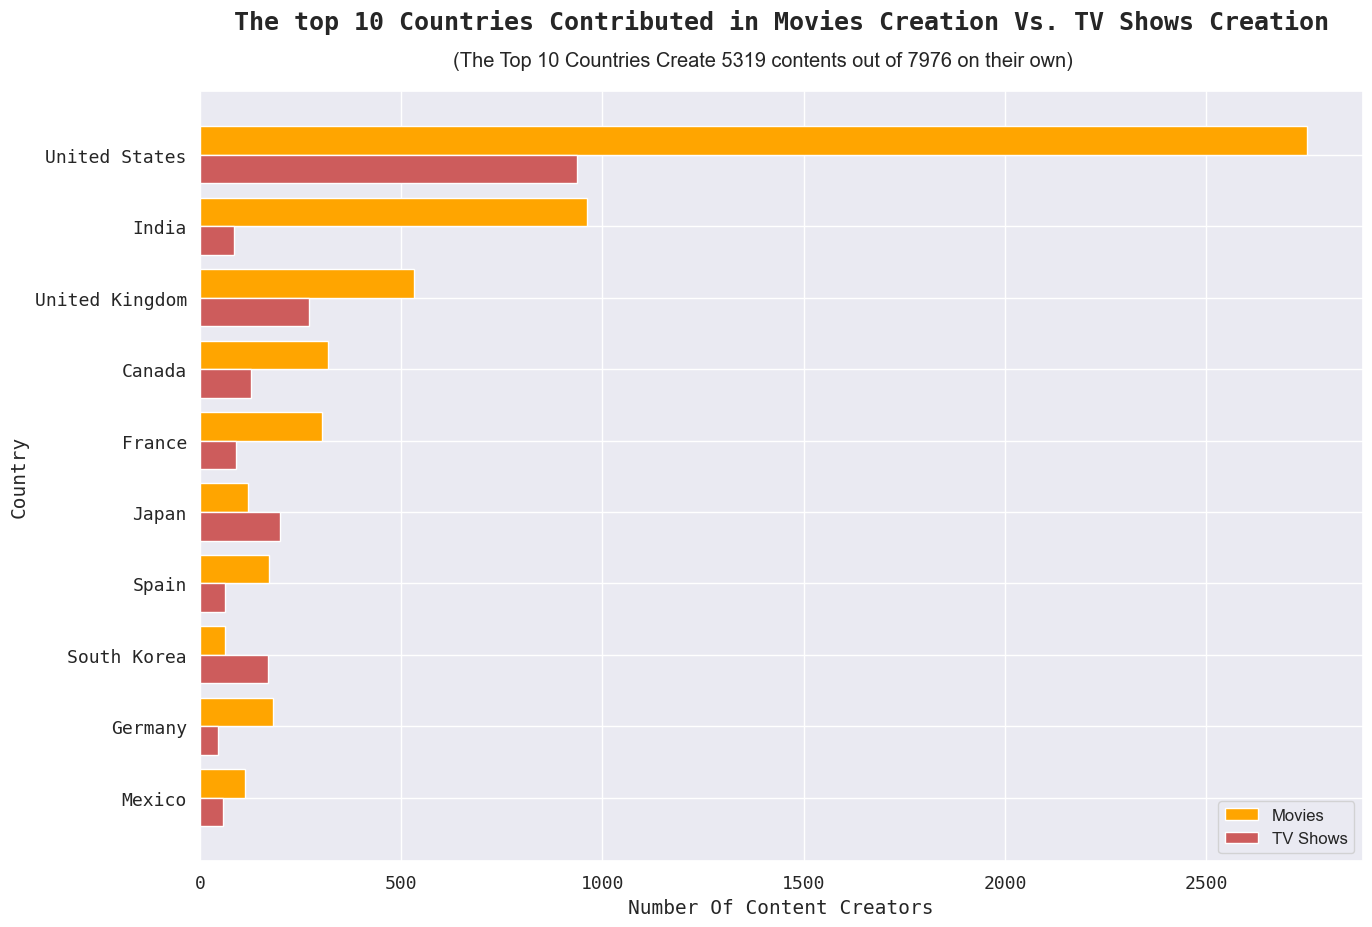

In [ ]:
# Now to plot the above data.

num_of_movies = all_contents['Number of Movies']
num_of_shows = all_contents['Number of TV Shows']

ind = np.arange(len(num_of_movies))
width = 0.4

figure = plt.figure(figsize=(15,10))
plt.barh(ind, num_of_movies, width, color='orange', label='Movies')
plt.barh(ind + width, num_of_shows, width, color='indianred', label='TV Shows')

plt.title(
    'The top 10 Countries Contributed in Movies Creation Vs. TV Shows Creation',
    fontname='monospace',
    fontsize=18,
    fontweight='bold',
    y=1.07
)

plt.suptitle(
    '(The Top 10 Countries Create {} contents out of {} on their own)'
    .format(
            sum(netflix_df
                .groupby('country')
                .size()
                .sort_values(ascending=False)[:10]
               ), 
            netflix_df.shape[0]
           ),
    y=0.92
)

plt.ylabel(
    'Country',
    fontname='monospace',
    fontsize=14
)

plt.xlabel(
    'Number Of Content Creators',
    fontname='monospace',
    fontsize=14
)

plt.yticks(ind + 0.2, labels= all_contents['Country'], fontsize=13, fontname='monospace')
plt.xticks(fontname='monospace', fontsize=13)
plt.gca().invert_yaxis()
plt.legend(fontsize='medium')


plt.savefig('CountriesContributed_in_MoviesCreationTop10.png', dpi=300, bbox_inches='tight')
plt.show()

<hr>

### 5.6. The most frequent categories
Also here, many movies or TV shows are categorized in different categories at the same time, and we want to take into count all the categories. So, we need to get in every movies/TV show and see its categories.

In [ ]:
# Split the categories into lists and explode into rows
categories_series = netflix_df['listed_in'].dropna().str.split(', ').explode()

# Count frequency of each category
results = categories_series.value_counts().reset_index()
results.columns = ["Category", "Frequency"]

# Show top 10
display(setting_dataframe(results.head(10)))

Category,Frequency
International Movies,2543
Dramas,2317
Comedies,1580
International TV Shows,1128
Action & Adventure,817
Documentaries,794
Independent Movies,745
TV Dramas,663
Romantic Movies,588
Thrillers,549


As we see, movies have their own categories which are different from the categories of TV shows. For example: Movies have "International Movies and Dramas" and TV Shows have "International TV Shows and TV Dramas" So, it's better to show them separately.

In [ ]:
# Filtering movies with non-null categories
movies_categories_df = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['listed_in'].notnull())]['listed_in']

movies = (
    movies_categories_df
    .str.split(', ')
    .explode()
    .value_counts()
    .reset_index()
)
movies.columns = ['Category', 'Frequency']

display(setting_dataframe(movies.head(10)))

Category,Frequency
International Movies,2543
Dramas,2317
Comedies,1580
Action & Adventure,817
Documentaries,794
Independent Movies,745
Romantic Movies,588
Thrillers,549
Children & Family Movies,535
Horror Movies,340


In [ ]:
shows_categories_df = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['listed_in'].notnull())]['listed_in']

shows = (
    shows_categories_df
    .str.split(', ')
    .explode()
    .value_counts()
    .reset_index()
)

shows.columns = ['Category', 'Frequency']
display(setting_dataframe(shows.head(10)))

Category,Frequency
International TV Shows,1128
TV Dramas,663
TV Comedies,501
Crime TV Shows,421
Kids' TV,370
Docuseries,330
Romantic TV Shows,299
British TV Shows,237
Reality TV,205
Anime Series,154


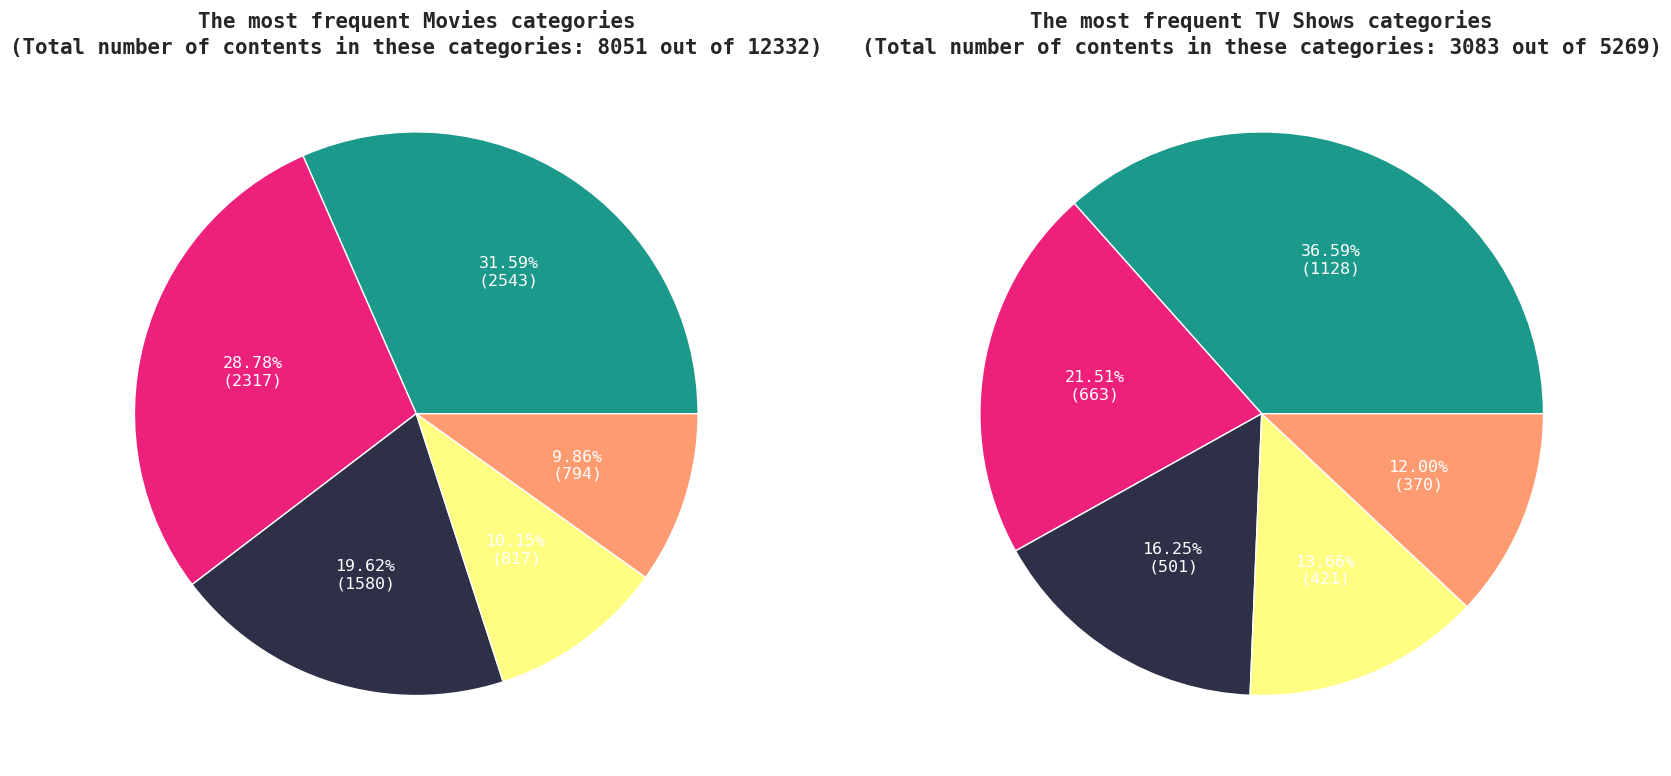

In [ ]:
def plot_pie(ax, data, title, colors):
    ax.pie(
        data["Frequency"],
        labels=data["Category"],
        colors=colors,
        autopct=make_autopct(data["Frequency"]),
        wedgeprops={"edgecolor": "white", "linewidth": 1, "antialiased": True},
        textprops={"fontname": "monospace", "fontsize": 12, "color":"white"}
    )
    ax.set_title(
        f"{title}\n(Total number of contents in these categories: "
        f"{data['Frequency'].sum()} out of {movies['Frequency'].sum() if title.startswith('The most frequent Movies') else shows['Frequency'].sum()})",
        fontname="monospace", fontsize=15, fontweight="bold"
    )

# Top categories
top_movies = movies.head(5)
top_shows = shows.head(5)
colors = ["#1B998B", "#ED217C", "#2D3047", "#FFFD82", "#FF9B71"]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
plot_pie(axes[0], top_movies, "The most frequent Movies categories", colors)
plot_pie(axes[1], top_shows, "The most frequent TV Shows categories", colors)

plt.savefig('TopMovieCategoriesPieChart.png', dpi=300, bbox_inches='tight')
plt.show()


<hr>

### 5.7. Number of movies and tv shows by MPA rating

In [ ]:
netflix_df['MPA_rating'].value_counts().sort_values(ascending=True)[:10]

MPA_rating
UR            3
NC-17         4
TV-Y7-FV      5
G            41
NR           81
TV-G        190
TV-Y        227
TV-Y7       236
PG          281
PG-13       483
Name: count, dtype: int64

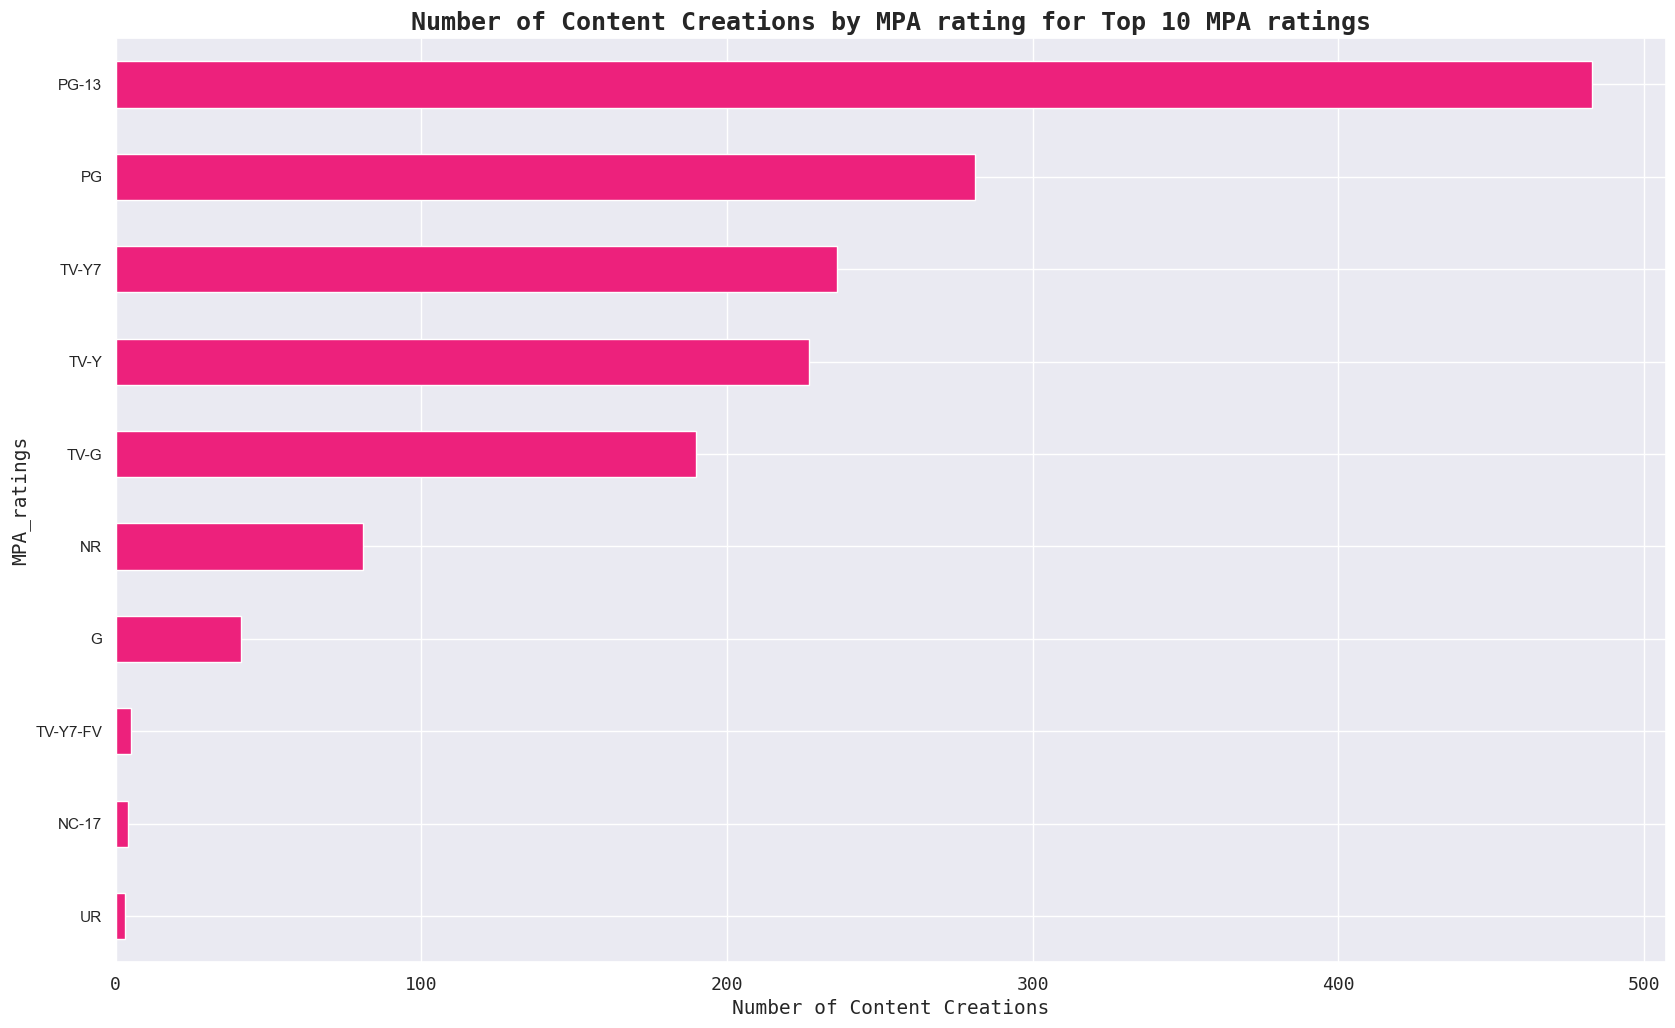

In [ ]:
figure = plt.figure(figsize=(20,12))
netflix_df['MPA_rating'].value_counts().sort_values()[:10].plot(kind='barh', color='#ED217C')

plt.title(
    'Number of Content Creations by MPA rating for Top 10 MPA ratings', 
    fontname='monospace', 
    fontsize=18, 
    fontweight='bold'
)

plt.xlabel(
    'Number of Content Creations',
    fontname='monospace',
    fontsize=14
)

plt.ylabel (
    'MPA_ratings',
    fontname='monospace',
    fontsize=14
)

plt.xticks (
    fontsize=13,
    fontname='monospace'
)

plt.savefig('ContentCreations_ByTop10MPARatings.png', dpi=300, bbox_inches='tight')
plt.show()

<hr>

### 5.8. My favourite movie/tv-show¶

In [ ]:
fav_tv_show = 'Friends'

setting_dataframe(netflix_df[netflix_df['title']== fav_tv_show])

type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description,month_added
TV Show,Friends,nan,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies","This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.",nan
